In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from numpy import genfromtxt
from brainspace.plotting import plot_hemispheres
from brainspace import mesh
import nibabel as nib
from matplotlib import cm
from matplotlib.colors import ListedColormap
from brainspace.utils.parcellation import map_to_labels
import hcp_utils as hcp
import scipy.stats as ss
import warnings
color_m = cm.get_cmap('prism', 91)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


## Markov Parcellation 

In [2]:
macaque_rh = mesh.mesh_io.read_surface('../data/macaque_data/surf/spec/MacaqueYerkes19.R.inflated.32k_fs_LR.surf.gii')
macaque_lh = mesh.mesh_io.read_surface('../data/macaque_data/surf/spec/MacaqueYerkes19.L.inflated.32k_fs_LR.surf.gii')

In [3]:
markov = '../data/markov.csv'
markov = genfromtxt(markov)
markov_64k = markov.copy()
markov_64k[np.where(markov_64k==0)]=np.nan

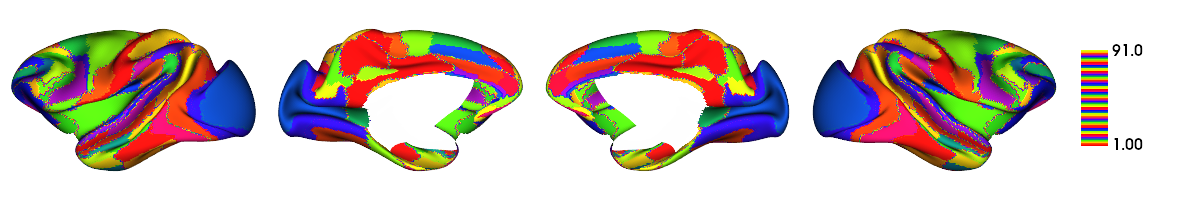

In [4]:
plot_hemispheres(macaque_lh, macaque_rh, array_name = markov_64k,
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = color_m, color_bar = True,
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/fig_4_markov_parcels.svg',transparent_bg=True,scale=(2,2))
plot_hemispheres(macaque_lh, macaque_rh, array_name = markov_64k,
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = color_m, color_bar = True,
                 interactive = False, zoom = 1.5, embed_nb = True)

### projection of human Cole-Anticevic networks to the macaque surface

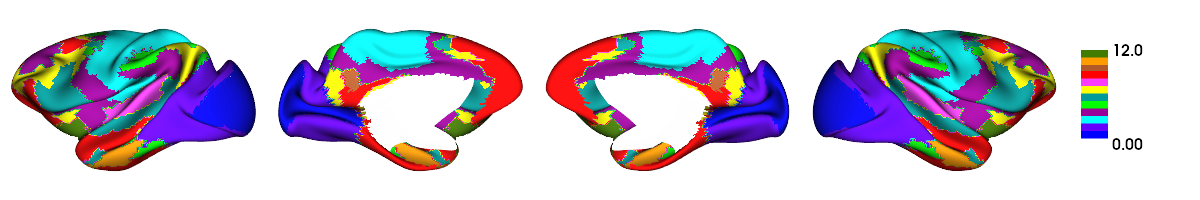

In [5]:
cmap = ListedColormap(np.vstack((list(hcp.ca_network['rgba'].values()))))

a = nib.load('../data/Ting/Glasser2016_language/L.HCP_MMP_P210.human-to-monkey.32k_fs_LR.label.gii').agg_data()
ca = np.array(pd.read_csv('../data/ca_glasser_network.csv',header=None))[:,0].astype(float)
color = ca[:180]

mask = a != 0
ca_macaque = map_to_labels(color, a, mask=mask)
ca_macaque[ca_macaque==0]=np.nan

plot_hemispheres(macaque_lh, macaque_rh, array_name = np.concatenate((ca_macaque,ca_macaque)),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = cmap, color_bar = True, color_range = (0,12),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 transparent_bg=True, screenshot=True, filename='../figures/fig_4_ca_macaque.png')
plot_hemispheres(macaque_lh, macaque_rh, array_name = np.concatenate((ca_macaque,ca_macaque)),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = cmap, color_bar = True, color_range = (0,12),
                 interactive = False, zoom = 1.5, embed_nb = True)

### macaque gradients of functional connectivity (LL, template space )

In [6]:
group = np.array(pd.read_csv('../data/data_results/macaque/group_grad_LL.csv',header = None))[:,:3]

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

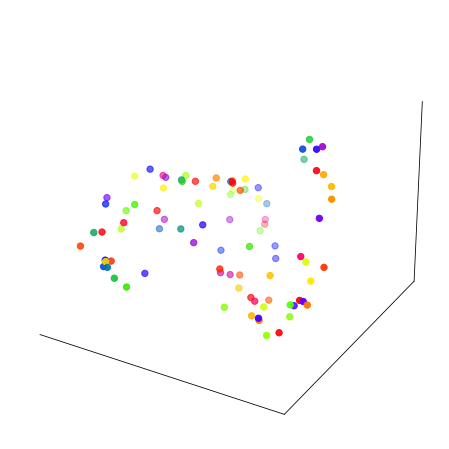

In [8]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.gca().patch.set_facecolor('white')
ax.w_xaxis.set_pane_color((1, 1, 1, 0))
ax.w_yaxis.set_pane_color((1, 1, 1, 0))
ax.w_zaxis.set_pane_color((1, 1, 1, 0))
#ax.set_xticks(np.arange(-0.12, 0.12, 0.04))
#ax.set_yticks(np.arange(-0.12, 0.12, 0.04))
#ax.set_zticks(np.arange(-0.12, 0.12, 0.04))
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.grid(False)
ax.scatter(group[:,0], group[:,1], group[:,2], s = 40, c = range(91), cmap=color_m, marker = 'o')
fig.savefig('../figures/fig_4_ll_3d_macaque.svg')

In [9]:
from brainspace.utils.parcellation import map_to_labels
labeling_l = markov[:32492]
labeling_r = markov[32492:]
mymask_l = labeling_l != 0         
mymask_r = labeling_r != 0     

In [10]:
ll_group = [None] * 3

for i in range(3):
    ll_group[i] = np.concatenate((map_to_labels(group[:,i], labeling_l, mask=mymask_l),
                                  map_to_labels(group[:,i], labeling_l, mask=mymask_l)))
    ll_group[i][ll_group[i]==0] = np.nan

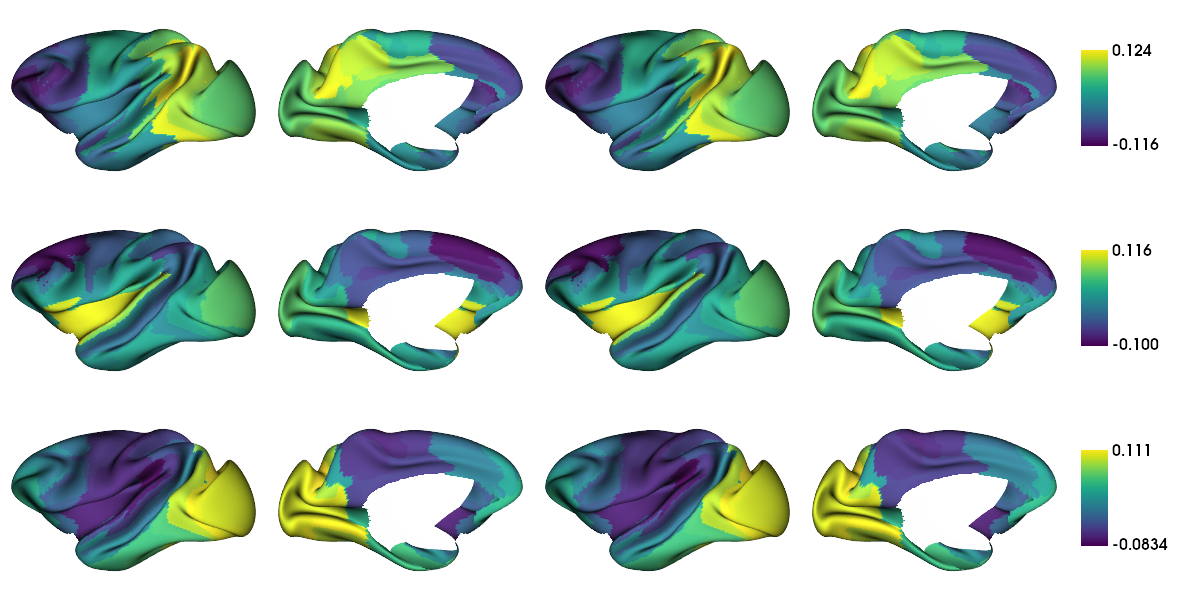

In [11]:
plot_hemispheres(macaque_lh, macaque_lh, array_name = ll_group,
                 nan_color = (1,1,1,0.01),size = (1200, 600),
                 cmap = 'viridis', color_bar = True,#color_range=(-0.12,0.12),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/fig_4_ll_g123.svg',transparent_bg=True,scale=(2,2))
plot_hemispheres(macaque_lh, macaque_lh, array_name = ll_group,
                 nan_color = (1,1,1,0.01),size = (1200, 600),
                 cmap = 'viridis', color_bar = True, #color_range=(-0.12,0.12),
                 interactive = False, zoom = 1.5, embed_nb = True)

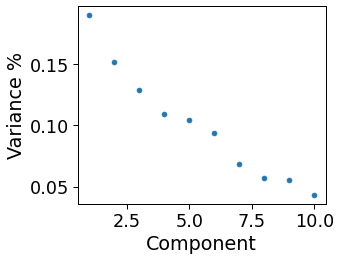

array([[0.18964022],
       [0.15152129],
       [0.12833554],
       [0.10900199],
       [0.10439928],
       [0.09336077],
       [0.06812891],
       [0.05706596],
       [0.05506884],
       [0.0434772 ]])

In [12]:
import seaborn as sns

sns.set_context("paper", font_scale = 2)
fig, ax = plt.subplots(1, figsize=(5, 4))
variance = np.array(pd.read_csv('../data/data_results/macaque/group_grad_LL_lambdas.csv',header=None))
explain = variance/np.sum(variance)
ax.scatter(range(1,11), explain)
ax.set_xlabel('Component')
ax.set_ylabel('Variance %')
fig.tight_layout()
plt.show()
fig.savefig('../figures/fig_4_variance.svg')
explain

## mean asymmetry index (AI) of macaque G1

In [13]:
intramean = np.array(pd.read_csv('../data/data_results/macaque/macaque_91_gradient_intra_mean.csv',header=None))
intermean = np.array(pd.read_csv('../data/data_results/macaque/macaque_91_gradient_inter_mean.csv',header=None))

In [14]:
intra_g1 = np.concatenate((map_to_labels(intramean[:,0], labeling_l, mask=mymask_l),
                           map_to_labels(intramean[:,0], labeling_r, mask=mymask_r)))
intra_g2 = np.concatenate((map_to_labels(intramean[:,1], labeling_l, mask=mymask_l),
                           map_to_labels(intramean[:,1], labeling_r, mask=mymask_r)))
intra_g3 = np.concatenate((map_to_labels(intramean[:,2], labeling_l, mask=mymask_l),
                           map_to_labels(intramean[:,2], labeling_r, mask=mymask_r)))
inter_g1 = np.concatenate((map_to_labels(intermean[:,0], labeling_l, mask=mymask_l),
                           map_to_labels(intermean[:,0], labeling_r, mask=mymask_r)))
inter_g2 = np.concatenate((map_to_labels(intermean[:,1], labeling_l, mask=mymask_l),
                           map_to_labels(intermean[:,1], labeling_r, mask=mymask_r)))
inter_g3 = np.concatenate((map_to_labels(intermean[:,2], labeling_l, mask=mymask_l),
                           map_to_labels(intermean[:,2], labeling_r, mask=mymask_r)))

intra_g1[np.where(intra_g1==0)]=np.nan
intra_g2[np.where(intra_g2==0)]=np.nan
intra_g3[np.where(intra_g3==0)]=np.nan
inter_g1[np.where(inter_g1==0)]=np.nan
inter_g2[np.where(inter_g2==0)]=np.nan
inter_g3[np.where(inter_g3==0)]=np.nan

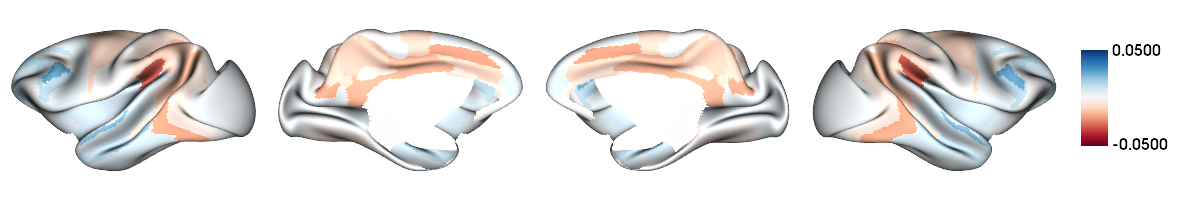

In [15]:
plot_hemispheres(macaque_lh, macaque_rh, array_name = intra_g1,
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'RdBu', color_bar = True, color_range=(-0.05, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/fig_4_intra_g1_mean.svg')
plot_hemispheres(macaque_lh, macaque_rh, array_name = intra_g1, color_range=(-0.05, 0.05),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'RdBu', color_bar = True,
                 interactive = False, zoom = 1.5, embed_nb = True)

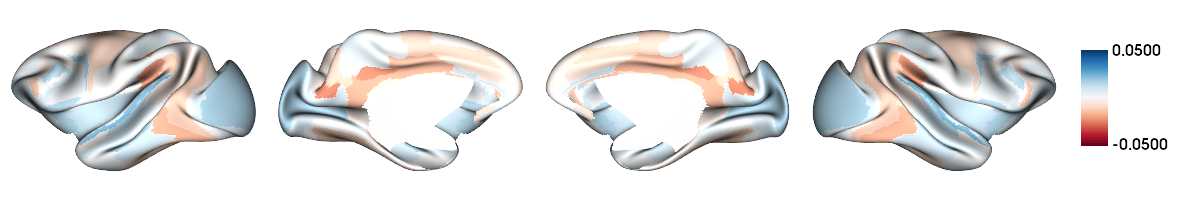

In [16]:
plot_hemispheres(macaque_lh, macaque_rh, array_name = inter_g1,
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'RdBu', color_bar = True, color_range=(-0.05, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/fig_4_inter_g1_mean.svg')
plot_hemispheres(macaque_lh, macaque_rh, array_name = inter_g1,
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'RdBu', color_bar = True, color_range=(-0.05, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True)

## Cohen's d in macaques and humans

In [17]:
macaque = pd.read_csv('../data/data_results/macaque/macaque_asymmetric_gradients_stats.csv')

In [18]:
# compute Cohen's d across 19 macaque
macaque['intra_g1_d']=macaque['intra_g1_t']/pow(19, 0.5)
macaque['inter_g1_d']=macaque['inter_g1_t']/pow(19, 0.5)

In [19]:
a = np.array(macaque['intra_g1_d'])
b = np.array(macaque['inter_g1_d'])
print(np.mean(a[a>0]),np.mean(a[a<0]),np.mean(b[b>0]),np.mean(b[b<0]))

0.2700069908276553 -0.2738045177629381 0.20421263598150222 -0.22020341189625617


In [20]:
intra_g1_m = np.concatenate((map_to_labels(macaque['intra_g1_d'], labeling_l, mask=mymask_l),
                                map_to_labels(macaque['intra_g1_d'], labeling_r, mask=mymask_r)))

inter_g1_m = np.concatenate((map_to_labels(macaque['inter_g1_d'], labeling_l, mask=mymask_l),
                                map_to_labels(macaque['inter_g1_d'], labeling_r, mask=mymask_r)))

intra_g1_m[np.where(intra_g1_m==0)]=np.nan
inter_g1_m[np.where(inter_g1_m==0)]=np.nan

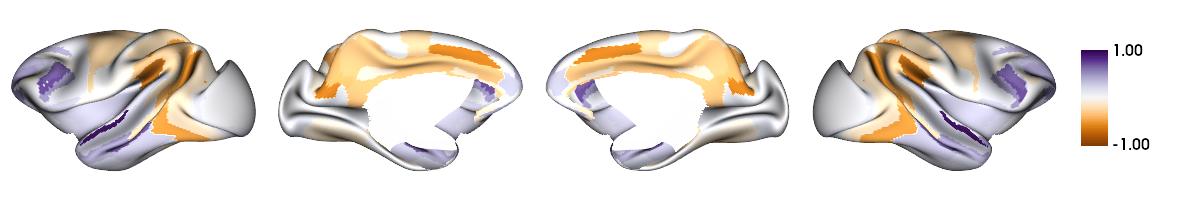

In [21]:
plot_hemispheres(macaque_lh, macaque_rh, array_name = intra_g1_m,
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'PuOr', color_bar = True, color_range = (-1,1),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/fig_4_intra_g1_cohen_macaque.svg',transparent_bg=True,scale=(2,2))
plot_hemispheres(macaque_lh, macaque_rh, array_name = intra_g1_m,
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'PuOr', color_bar = True, color_range = (-1,1),
                 interactive = False, zoom = 1.5, embed_nb = True)

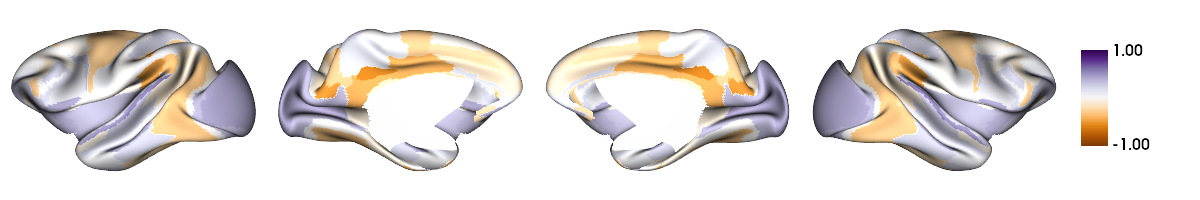

In [22]:
plot_hemispheres(macaque_lh, macaque_rh, array_name = inter_g1_m,
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'PuOr', color_bar = True, color_range = (-1,1),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/fig_4_inter_g1_cohen_macaque.svg',transparent_bg=True,scale=(2,2))
plot_hemispheres(macaque_lh, macaque_rh, array_name = inter_g1_m,
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'PuOr', color_bar = True, color_range = (-1,1),
                 interactive = False, zoom = 1.5, embed_nb = True)

###  Human data aligned to macaque -> Cohen's d

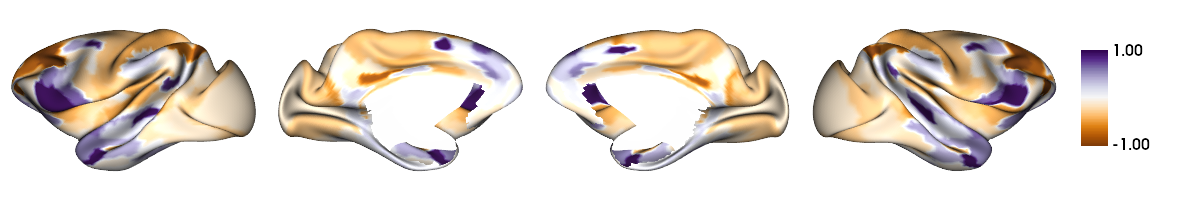

In [23]:
l_cohen_intra_hm = nib.load('../data/data_results/macaque/aligned_20220511/lh.cohen_intra_LR_human.human-to-monkey.32k_fs_LR.nii.gz').get_fdata()[:,0][:,0]
r_cohen_intra_hm = nib.load('../data/data_results/macaque/aligned_20220511/rh.cohen_intra_LR_human.human-to-monkey.32k_fs_LR.nii.gz').get_fdata()[:,0][:,0]
cohen_intra_hm = np.concatenate((l_cohen_intra_hm,r_cohen_intra_hm))
cohen_intra_hm[cohen_intra_hm==0]=np.nan
cohen_intra_hm = [cohen_intra_hm[:,0],cohen_intra_hm[:,1],cohen_intra_hm[:,2]]

plot_hemispheres(macaque_lh, macaque_rh, array_name = cohen_intra_hm[0],
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'PuOr', color_bar = True, color_range = (-1,1),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/fig_4_intra_cohen_g1_hm.svg')
plot_hemispheres(macaque_lh, macaque_rh, array_name = cohen_intra_hm[0],
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'PuOr', color_bar = True, color_range = (-1,1),
                 interactive = False, zoom = 1.5, embed_nb = True)

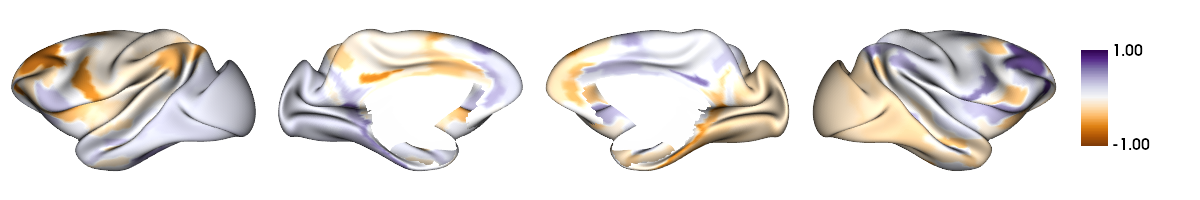

In [24]:
l_cohen_inter_hm = nib.load('../data/Ting/aligned_20210409/lh.cohen_LR_inter_human.human-to-monkey.32k_fs_LR.nii.gz').get_fdata()[:,0][:,0]
r_cohen_inter_hm = nib.load('../data/Ting/aligned_20210409/rh.cohen_LR_inter_human.human-to-monkey.32k_fs_LR.nii.gz').get_fdata()[:,0][:,0]
cohen_inter_hm = np.concatenate((l_cohen_inter_hm,r_cohen_inter_hm))
cohen_inter_hm[cohen_inter_hm==0]=np.nan
cohen_inter_hm = [cohen_inter_hm[:,0],cohen_inter_hm[:,1],cohen_inter_hm[:,2]]

plot_hemispheres(macaque_lh, macaque_rh, array_name = cohen_inter_hm[0],
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'PuOr', color_bar = True, color_range = (-1,1),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/fig_4_inter_cohen_g1_hm.svg',transparent_bg=True,scale=(2,2))
plot_hemispheres(macaque_lh, macaque_rh, array_name = cohen_inter_hm[0],
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'PuOr', color_bar = True, color_range = (-1,1),
                 interactive = False, zoom = 1.5, embed_nb = True)

## for macaques vs humans
## please use new results from result_supplement_3.ipynb macaque session where averaging right and left hemipshere alignment 